# Probability II

We have determined whether a coin is fair or not. Now let's take a more real example.

## The Case
Let's assume you are a data analyst/scientist at one of travel e-commerce. You have a task to increase the user engagement on our platform. To simplify our problem let's also assume that we only have two pages: 

### Home Page
![Home](img/002-01.png)

### Search Result Page
![srp](img/002-02.png)

**First thing first**, as a quantitative analyst, you should ask yourself and your business people:

> What does it mean by user engagement on our platform?

One possible answer is **Tendency of users to use our platform functions**. How to measure such tendency then? Getting back to the home page, we have search function. 

We also know that one of the possible answers is to measure the usage of that button to move into the search result page. Of course, to quantify these measurements, we need some standard metrics.

## Online Metric: Click Through Probability (CTP) and Click Through Rate (CTR)

Here we have defined two popular metrics to measure the page/function effectiveness, CTP $^{[1]}$ and CTR $^{[2]}$. Their definitions are:

$$
CTR = \frac{\text{number of clicks in funnel 2}}{\text{number of clicks in funnel 1}}
$$

$$
CTP = \frac{\text{number of unique users in funnel 2}}{\text{number of unique users in funnel 1}}
$$


for this case, 

$$
CTR_{\text{home_page}-\text{search_result_page}} = \frac{\text{number of clicks on search_result_page}}{\text{number of clicks on home_page}}
$$

$$
CTP_{\text{home_page}-\text{search_result_page}} = \frac{\text{number of unique users on search_result_page}}{\text{number of unique users on home_page}}
$$



In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import seaborn as sns
import scipy.stats as st
from func import *

/home/elvyna/miniconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Assumptions in This Notebook

1. On 1 day there are **100 users** visiting home page, uniformly distributed and unchanged throughout the week. 
2. Within each day, there are **1000 visits** to home page and **200** click through towards search result page.

Implement these assumption in simulation and function to calculate CTP and CTR.

In [177]:
np.random.seed(310)
# TODO generate random experiments
users_activities_in_home_page = np.random.choice(100, size=1000)
users_activities_in_srp = np.random.choice(100, size=200)

In [178]:
def ctp(funnel_1_log, funnel_2_log):
    """
    calculate the Click Through Probability between funnel 1 and funnel 2.
    CTP should be 0 <= CTP <= 1
    Args: 
    ----
    funnel_1_log: list of int (user id)
    funnel_2_log: list of int (user id)
    
    Output:
    ----
    ctp: float
    """
    # TODO: code here
    funnel_1_users = np.unique(funnel_1_log)
    funnel_2_users = np.unique(funnel_2_log)
    convert = np.intersect1d(funnel_1_users, funnel_2_users)
    
    ctp = np.size(convert) / np.size(funnel_1_users)
    return ctp

def ctr(funnel_1_log, funnel_2_log):
    """
    calculate the Click Through Rate between funnel 1 and funnel 2. 
    CTR may be more than 1, the only constraint that it has is
    CTR >= 0
    Args: 
    ----
    funnel_1_log: list of int (user id)
    funnel_2_log: list of int (user id)
    
    Output:
    ----
    ctr: float
    """    
    # TODO: code here
    ctr = np.size(funnel_2_log) / np.size(funnel_1_log)
    return ctr

In [179]:
ctp_current = ctp(users_activities_in_home_page, users_activities_in_srp)
ctr_current = ctr(users_activities_in_home_page, users_activities_in_srp)
# test if your functions has been correctly implemented
assert np.isclose(ctp_current, 0.92)
assert np.isclose(ctr_current, 0.2)

We are only interested in CTP right now. So now the question is:

> given this number what is our probability to get this number? 


So with above assumptions and this question, we might have an idea that we should generate a simulation.

In [180]:
def simulate_ctp(
    n_activities_home_page, n_activities_search_page, 
    n_users=100, n_simulations=500
):
    ctps = []
    # TODO: code here
    for i in range(n_simulations):
        users_activities_home = np.random.choice(n_users, n_activities_home_page)
        users_activities_srp = np.random.choice(n_users, n_activities_search_page)
    
        ctps.append(ctp(users_activities_home, users_activities_srp))
    
    return np.array(ctps)

In [181]:
# DO NOT CHANGE THIS
ctps = simulate_ctp(1000, 200)

assert len(ctps) == 500

In [201]:
pd.DataFrame(ctps, columns=['x'])['x'].value_counts().sort_values()

0.780000     1
0.848485     1
0.858586     1
0.930000     6
0.800000     6
0.810000     8
0.920000    16
0.910000    17
0.820000    17
0.900000    36
0.830000    36
0.840000    46
0.850000    51
0.890000    58
0.860000    64
0.870000    67
0.880000    69
Name: x, dtype: int64

Now we have generated enough simulations to draw what is the frequency of each number to happen. But wait! There is a problem! If we group by the numbers of simulated CTPs, we might get all counts to zero! 

Why? Because it is a continuous number!

Solution? I have to bin each CTP. Hint: 
- Use `np.linspace` to generate bins, with lower bound 0.7 and upper bound 1, nbins = 20
- Use `np.digitize` to group ctps to each bin
- Use `np.unique` to generate bin index and bin counts

In [183]:
# TODO: code here
bins = np.linspace(start=0.7, stop=1, num=20)
ctp_bins = np.digitize(ctps, bins)
ctp_bin_indexes, ctp_bin_counts = np.unique(ctp_bins, return_counts=True)

ctp_current_bin = np.digitize(ctp_current, bins)

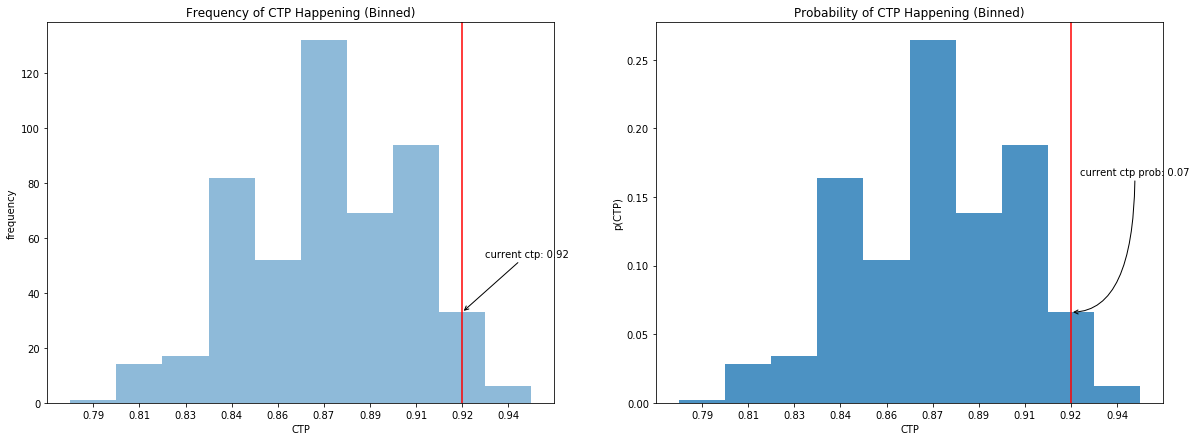

In [184]:
draw_ctp_happening_binned(
    ctp_current, 
    bins, 
    ctp_bin_indexes, 
    ctp_bin_counts, 
    ctp_current_bin
)

*Congratulations!* You've just made a histogram.

### Bonus simulation

Here's an interactive graph that tells how the frequencies and probabilities changed over when we do 20 - thousands of simulations.

In [185]:
draw_interactive_bar_plot_for_simulations(
    make_df_for_simulations(simulate_ctp)
)

In [186]:
draw_interactive_prob_bar_plot_for_simulations(
    make_df_for_simulations(simulate_ctp)
)

## Probability Density Function & Cumulative Density Function


There is a way to prevent simulations like this to be run over and over again, it is to use probability density function and cumulative density function.

### Probability Density Function (PDF)

For a **continuous variable**, it is essentially a mathematical model to predict$^{[4]}$

> how much more likely it is that the random variable would equal one sample compared to the other sample

or in simpler words **"how likely a number will happen?"**

Notice that the result from a PDF can be more than 1, as shown in this example. This is because PDF is not the probability itself, but a relative probability. To calculate the probability of **a number** happening is **impossible** and will be close to 0. Why? Because there are infinite numbers that approaches that number.

What we can do is to calculate

> **The probability of a number will fall between a range**,

e.g. the probability of a number will fall between $0.55$ and $0.63$. This is calculated as the area under curve for PDF - *using integrals!*


### Gaussian / Normal Distribution

A Gaussian distribution $^{[3]}$ is the most commonly used distribution. It is shaped like a bell curve. We will draw this using code instead of showing you a picture. Assume that the CTPs are spread like a bell curve, we will need at least 2 parameters to generate the Gaussian distribution: **mean** and **variance**. A variance could be replaced by **standard deviation** because it is essentially:

$$
Var[X] = \sigma^2
$$

where $\sigma$ is the standard deviation of a random variable $X$.

In [187]:
# TODO: code here
mean_ctp = np.mean(ctps)
std_ctp = np.std(ctps)
lower_1_sigma_ctp, upper_1_sigma_ctp = (mean_ctp - std_ctp), (mean_ctp + std_ctp)

Now, we can draw the CTP distribution using just a function in seaborn:

```python
sns.distplot(random_variable)
```

while the other code below will just be a complementary to explain and annotate each points

/home/elvyna/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



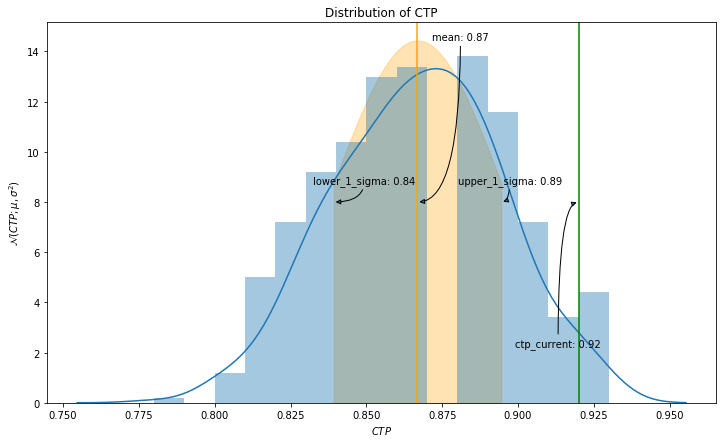

In [188]:
f, ax = plt.subplots(figsize=(12, 7))


# TODO: code here using sns distplot, 1 line only
sns.distplot(ctps)


plt.axvline(mean_ctp, color='orange')
x_lower_to_upper = np.linspace(lower_1_sigma_ctp, upper_1_sigma_ctp)
plt.fill_between(x_lower_to_upper, st.norm.pdf(x_lower_to_upper, mean_ctp, std_ctp), color='orange', alpha=0.3)
plt.axvline(ctp_current, color='green')
values = dict(
    mean=mean_ctp,
    lower_1_sigma=lower_1_sigma_ctp,
    upper_1_sigma=upper_1_sigma_ctp,
    ctp_current=ctp_current
)
for k, val in values.items():
    
    x_text, y_text = val + np.random.uniform(-std_ctp, std_ctp), st.norm.pdf(val, loc=mean_ctp, scale=std_ctp)
    plt.annotate(
        '{}: {:.2f}'.format(k, val),
        (val,8),
        xytext=(x_text, y_text),
        arrowprops=dict(
            arrowstyle='-|>',
            connectionstyle='angle3'
        )
    )

plt.title('Distribution of CTP')
plt.xlabel('$CTP$')
plt.ylabel('$\mathcal{N}(CTP; \mu, \sigma^2)$')
plt.show()

Y-axis shows the PDF result for each point in X-axis. As mentioned earlier, this PDF function is allowed to surpass 1.

Now, to get the hang of the Gaussian distribution's PDF, you might as well implement the formula$^{[3]}$ by yourself and test it with our unit test below.

In [189]:
def gaussian_dist_pdf(x, mean, std):
    # TODO: code here
    var = std ** 2
    return 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-((x - mean)**2) / (2 * var))

In [190]:
assert np.isclose(
    gaussian_dist_pdf(0.85, mean_ctp, std_ctp),
    st.norm.pdf(0.85, loc=mean_ctp, scale=std_ctp)
)

In [191]:
st.norm.pdf(0.85, loc=mean_ctp, scale=std_ctp)

11.995073810274574

### Cumulative Density Function (CDF)

The CDF is a function to calculate the **probability** of a number will fall between a certain range. This will sum up to 1 because *it is* the probability, unlike probability density function. How do we calculate $p(CTP)=0.92$ like in our case? Since 0.92 falls in the bin in the range of 0.90-0.92, we can approximate the value as

$$
p(0.90 \leq CTP \leq 0.92) = F(0.92) - F(0.90)
$$

In [192]:
# TODO: code here
prob_092 = (st.norm.cdf(0.92, loc=mean_ctp, scale=std_ctp)) - (st.norm.cdf(0.90, loc=mean_ctp, scale=std_ctp))

In [196]:
assert np.isclose(prob_092, 0.087802724)

print('p(0.90 ≤ CTP ≤ 0.92) = {:.2%}'.format(prob_092))

p(0.90 ≤ CTP ≤ 0.92) = 8.78%


It produces the same probabilty as in our simulation!

The following figures should show you the way to calculate the probability from CDF.

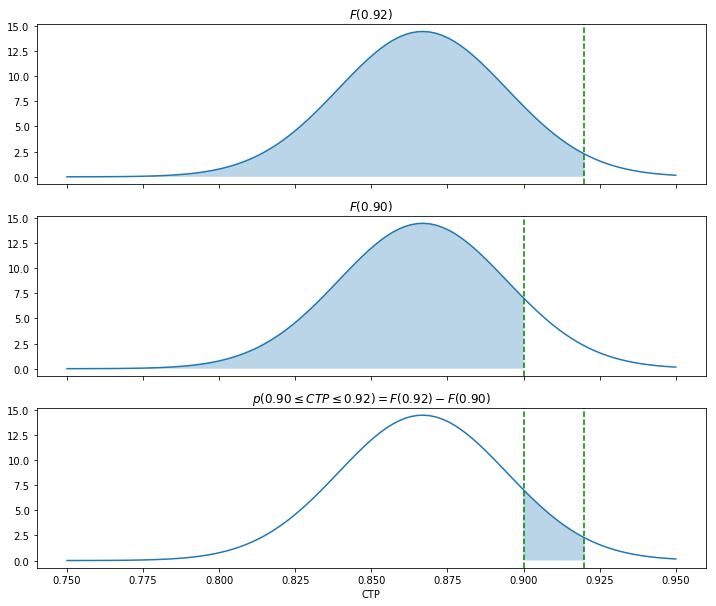

In [197]:
f, ax = plt.subplots(figsize=(12, 10), nrows=3, sharex=True)
all_x = np.linspace(0.75, 0.95, 100)
x_to_90 = np.linspace(0.75, 0.90, 100)
x_to_92 = np.linspace(0.75, 0.92, 100)
x_90_to_92 = np.linspace(0.90, 0.92, 100)

ax[0].plot(all_x, st.norm.pdf(all_x, mean_ctp, std_ctp))
ax[0].fill_between(x_to_92, st.norm.pdf(x_to_92, mean_ctp, std_ctp), alpha=0.3)
ax[0].set_title('$F(0.92)$')
ax[0].axvline(0.92, linestyle='--', c='g')
ax[1].plot(all_x, st.norm.pdf(all_x, mean_ctp, std_ctp))
ax[1].fill_between(x_to_90, st.norm.pdf(x_to_90, mean_ctp, std_ctp), alpha=0.3)
ax[1].set_title('$F(0.90)$')
ax[1].axvline(0.90, linestyle='--', c='g')
ax[2].plot(all_x, st.norm.pdf(all_x, mean_ctp, std_ctp))
ax[2].fill_between(x_90_to_92, st.norm.pdf(x_90_to_92, mean_ctp, std_ctp), alpha=0.3)
ax[2].set_title('$p(0.90 \leq CTP \leq 0.92) = F(0.92) - F(0.90)$')
ax[2].set_xlabel('CTP')
ax[2].axvline(0.90, linestyle='--', c='g')
ax[2].axvline(0.92, linestyle='--', c='g');

# References

[1] 12 Estimating Click Through Probability. (2019). Retrieved from [https://www.youtube.com/watch?v=LFLSApHc-jM](https://www.youtube.com/watch?v=LFLSApHc-jM)

[2] Wikipediaorg. (2019). Wikipediaorg. Retrieved 9 April, 2019, from https://en.wikipedia.org/wiki/Click-through_rate


[3] Wikipediaorg. (2019). Wikipediaorg. Retrieved 9 April, 2019, from https://en.wikipedia.org/wiki/Normal_distribution

[4] Wikipediaorg. (2019). Wikipediaorg. Retrieved 9 April, 2019, from https://en.wikipedia.org/wiki/Probability_density_function
